In [1]:
!pip install scikit-optimize
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import statsmodels.stats.api as sms
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

<ipython-input-2-b46d91121558>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Functions

In [5]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [64]:
def target_distr_linear(train_label, test_label, predicted_dv): 
    sns.kdeplot(train_label, label='train')
    sns.kdeplot(test_label, label='test')
    sns.kdeplot(predicted_dv, label='pred')
    plt.legend()
    plt.show()

    ddd = pd.DataFrame({'test_lbl': test_label, 'pred_lbl':predicted_dv})
    sns.scatterplot(ddd, x='test_lbl', y='pred_lbl', color='blueviolet')
    plt.title('Linear model')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

In [7]:
from scipy.stats import norm

def draw_histogram(data):
    f,ax_hist = plt.subplots(1)
    sns.distplot(data, hist=True,  kde=True, rug=True, bins=10, fit=norm, ax=ax_hist);
    plt.xlabel("values")
    plt.title("Distribution") 

    mean=data.mean()

    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean={mean:.3f}")
    ax_hist.legend()

    plt.show()

In [8]:
def draw_res_analys(errors, pred):
    sns.scatterplot(list(range(len(errors))),errors);
    plt.title("Distibution of errors")
    plt.ylabel('Error');
    plt.xlabel('Index');
    plt.show();

    sns.scatterplot(pred,errors);
    plt.title('Relationship of true value vs error (resudual analysis)')
    plt.ylabel('Error');
    plt.xlabel('True value');
    plt.show();

In [9]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp, y=model.feature_names_)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

### Load df

In [10]:
import pickle

with open('/content/drive/My Drive/Diploma/CODE/dataset_FOREIGN_kws_oscr.pkl', 'rb') as f:
    df_kws = pickle.load(f, encoding='utf-8')

In [11]:
df_kws.drop(columns=['age_access_type', 'name', 'director', 'genre', 'average_rating',
       'type', 'country', 'release_type', 'release_year', 'duration', 'actor',
       'ACTOR', 'COMPOSER', 'DESIGN', 'DIRECTOR', 'EDITOR',
       'OPERATOR', 'PRODUCER', 'WRITER', 'BUDGET', 'MARKETING', 'RUS', 'USA',
       'WORLD', 'element_id', 'rating', 'has_oscar_actor', 'has_oscar_composer',
       'has_oscar_design', 'has_oscar_director', 'has_oscar_editor',
       'has_oscar_operator', 'has_oscar_producer', 'has_oscar_writer'], axis=1, inplace=True)

In [12]:
df_kws

,element_uid,джек,расследовать,подруга,ограбление,катя,макс,мечтать,отважный,фрэнк,...,вылечивать,землянин,рон,головоломка,крюк,чета,зебра,сидень,беатрис,рыбка
0,e785baa6-f175-42b4-9e16-4319ac7991d5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4593737e-de9c-40df-97db-fb3cf85a08ef,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11ba66db-e941-4c3a-8da6-d8900e56f8c7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3f30a2ef-53b7-40e3-954f-1bdfc38a6d17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ba6bec1a-3aa9-48c7-aa65-908c21627a12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,c9a2b583-f550-4eaf-aab8-43f36f06695a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10480,36e51c56-2e1c-4f27-b2a7-8dd533e40184,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10482,3778b733-3b91-40b0-a40f-a3e053d32df4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10487,0bfb5a13-50fc-48f3-b51a-a30971024651,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
with open('/content/drive/My Drive/Diploma/CODE/data/new_eng_data.pkl', 'rb') as f:
    df = pickle.load(f)

In [14]:
df.shape

(8784, 40)

In [15]:
df = df.merge(df_kws, on=['element_uid'])

In [16]:
df.shape

(8784, 1040)

In [20]:
with open('/content/drive/My Drive/Diploma/CODE/watches_target_dataset.pkl', 'rb') as f:
    df_target = pickle.load(f, encoding='utf-8')

In [21]:
df_target = df_target[['uid', 'target']]

In [22]:
df_target.rename(columns={'uid': 'element_uid'}, inplace=True)

In [23]:
df_target.shape, df.shape

((11666, 2), (8784, 1040))

In [24]:
df = df.merge(df_target, on='element_uid')

In [25]:
df.shape

(6576, 1041)

In [26]:
df.columns[-30:]

Index(['ханна', 'отпор', 'воришка', 'одри', 'деспотичный', 'хэл', 'шоубизнес',
       'провоцировать', 'селин', 'уолтер', 'непобедимый', 'молль', 'небывалый',
       'ларри', 'харпер', 'прихожанин', 'спецподразделение', 'сущий', 'пята',
       'вылечивать', 'землянин', 'рон', 'головоломка', 'крюк', 'чета', 'зебра',
       'сидень', 'беатрис', 'рыбка', 'target'],
      dtype='object')

# Preprocessing

In [27]:
prep_df = df.copy(deep=True)

In [28]:
prep_df.shape

(6576, 1041)

In [29]:
prep_df.isna().sum()

age_access_type      0
name                 0
director             2
genre                0
average_rating     156
                  ... 
зебра                0
сидень               0
беатрис              0
рыбка                0
target               0
Length: 1041, dtype: int64

### filter by year

In [30]:
prep_df = prep_df[prep_df['release_year'] >= 2000]

In [31]:
prep_df.shape

(4953, 1041)

In [32]:
prep_df.isna().sum()

age_access_type      0
name                 0
director             0
genre                0
average_rating     147
                  ... 
зебра                0
сидень               0
беатрис              0
рыбка                0
target               0
Length: 1041, dtype: int64

### topN

In [33]:
import ast

columns = ['ACTOR', 'COMPOSER', 'DESIGN', 'DIRECTOR', 'EDITOR',
                      'OPERATOR', 'PRODUCER', 'WRITER', 'country', 'genre']
for col in columns:
    prep_df[col] = prep_df[col].apply(lambda x: ast.literal_eval(x) if not isinstance(x, float) else np.nan)

In [34]:
prep_df.dropna(subset=['ACTOR', 'COMPOSER', 'DESIGN', 'DIRECTOR', 'EDITOR', 'OPERATOR', 'PRODUCER', 'WRITER'],
              inplace=True)

In [35]:
prep_df.shape

(3759, 1041)

In [36]:
prep_df.isna().sum()

age_access_type     0
name                0
director            0
genre               0
average_rating     53
                   ..
зебра               0
сидень              0
беатрис             0
рыбка               0
target              0
Length: 1041, dtype: int64

In [37]:
def add_topN_feature(df, col, n: int):
    items = []
    
    for i in df[col]:
        items.extend(i)

    topN = [x[0] for x in Counter(items).most_common()][:n]

    df[f'top{n}{col}'] = df[col].apply(lambda x: [int(item in x) for item in topN])
    df.drop(col, axis=1, inplace=True)
    return topN, f'top{n}{col}'

In [38]:
def ohe_topN_features(df, topN, cat):
    for i in range(len(topN)):
        df[f'{topN[i]}'] = [item[i] for item in df[cat]]
    df.drop(cat, axis=1, inplace=True)
    return df

In [39]:
prep_df.columns

Index(['age_access_type', 'name', 'director', 'genre', 'average_rating',
       'type', 'country', 'release_type', 'release_year', 'duration',
       ...
       'землянин', 'рон', 'головоломка', 'крюк', 'чета', 'зебра', 'сидень',
       'беатрис', 'рыбка', 'target'],
      dtype='object', length=1041)

In [40]:
top10genres, name = add_topN_feature(prep_df, 'genre', 10)
prep_df = ohe_topN_features(prep_df, top10genres, name)

top5countries, name = add_topN_feature(prep_df, 'country', 5)
prep_df = ohe_topN_features(prep_df, top5countries, name)

top10actors, name = add_topN_feature(prep_df, 'ACTOR', 10)
prep_df = ohe_topN_features(prep_df, top10actors, name)

top3directors, name = add_topN_feature(prep_df, 'COMPOSER', 3)
prep_df = ohe_topN_features(prep_df, top3directors, name)

top2DESIGN, name = add_topN_feature(prep_df, 'DESIGN', 2)
prep_df = ohe_topN_features(prep_df, top2DESIGN, name)

top2DIRECTOR, name = add_topN_feature(prep_df, 'DIRECTOR', 2)
prep_df = ohe_topN_features(prep_df, top2DIRECTOR, name)

top2EDITOR, name = add_topN_feature(prep_df, 'EDITOR', 2)
prep_df = ohe_topN_features(prep_df, top2EDITOR, name)

top2OPERATOR, name = add_topN_feature(prep_df, 'OPERATOR', 2)
prep_df = ohe_topN_features(prep_df, top2OPERATOR, name)

top3PRODUCER, name = add_topN_feature(prep_df, 'PRODUCER', 3)
prep_df = ohe_topN_features(prep_df, top3PRODUCER, name)

top2WRITER, name = add_topN_feature(prep_df, 'WRITER', 2)
prep_df = ohe_topN_features(prep_df, top2WRITER, name)

In [41]:
prep_df.head().T

,4,10,14,17,18
age_access_type,6,16,16,12,12
name,Пламенное сердце,Звездный путь,Стартрек: Бесконечность,Звёздный путь: Возмездие,Стартрек: Возмездие
director,"['40f78e6d-3c9f-434f-a505-c6ffdd045763', '3321...",['5a7ba90d-25b5-40ed-aa38-c923850c254c'],['d4ecb571-a231-4d94-8c78-1f84e674c53e'],['d463cdfe-1e75-40d6-b185-bfedf51fdf56'],['5a7ba90d-25b5-40ed-aa38-c923850c254c']
average_rating,6.4,7.75,6.9,6.71,7.63
type,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE
...,...,...,...,...,...
Боб Вайнштейн,0,0,0,0,0
Харви Вайнштейн,0,0,0,0,0
Арнон Милчен,0,0,0,0,0
Люк Бессон,0,0,0,0,0


In [42]:
prep_df.columns

Index(['age_access_type', 'name', 'director', 'average_rating', 'type',
       'release_type', 'release_year', 'duration', 'actor', 'element_uid',
       ...
       'Ридли Скотт', 'Крис Гилл', 'Джеффри Форд', 'Роджер Дикинс',
       'Дариуш Вольски', 'Боб Вайнштейн', 'Харви Вайнштейн', 'Арнон Милчен',
       'Люк Бессон', 'Джек Кёрби'],
      dtype='object', length=1072)

In [43]:
prep_df.columns[:30]

Index(['age_access_type', 'name', 'director', 'average_rating', 'type',
       'release_type', 'release_year', 'duration', 'actor', 'element_uid',
       'BUDGET', 'MARKETING', 'RUS', 'USA', 'WORLD', 'element_id', 'rating',
       'has_oscar_actor', 'has_oscar_composer', 'has_oscar_design',
       'has_oscar_director', 'has_oscar_editor', 'has_oscar_operator',
       'has_oscar_producer', 'has_oscar_writer', 'poster_url',
       'poster_url_preview', 'has_imax', 'has_3_d', 'has_sequel'],
      dtype='object')

In [44]:
prep_df.drop(['director', 'average_rating', 'release_type', 'actor', 'element_id', 'rating'], axis=1, inplace=True)

In [45]:
skewed_num_features = ['duration', 'BUDGET', 'MARKETING', 'RUS', 'USA', 'WORLD'] 

In [46]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

class Preprocesser:
    def __init__(self, 
#                 mulpiple_cat_features: list,
                skewed_num_features: list,
               # text_features: list,
               # release_year_feature: str,
#                 mltpl_cat_n_top: dict
                ):
#         self.mulpiple_cat_features = mulpiple_cat_features
        self.skewed_num_features = skewed_num_features
        #self.text_features = text_features
#         self.mltpl_cat_n_top = mltpl_cat_n_top
       # self.release_year_feature = release_year_feature
        # self.tokenizer = Tokenizer(nlp.vocab)
        
    def __get_top_n_mltpl_cat_features(self, df_pr, col):
        all_cats = []
        for element_values in df_pr[col]:
            all_cats.extend(element_values)
        return Counter(all_cats).most_common(self.mltpl_cat_n_top[col])
            
    def __preprocess_mulpiple_cat_features(self, df_pr):
        for col in self.mulpiple_cat_features:
            feature_number = self.mltpl_cat_n_top[col]
            df_pr[[f'{col}_{i}' for i in range(feature_number)]] = pd.DataFrame(np.full((len(df), feature_number), np.nan))
            for i in df_pr.index:
                names = df_pr.loc[i, col]
                for k, name in enumerate(names[:int(feature_number)]):
                    df_pr.loc[i, f'{col}_{k}'] = name
            df_pr.drop(col, axis=1, inplace=True)

        return df_pr
    
    def __preprocess_skewed_num_features(self, df_pr):
        for col in self.skewed_num_features:
            df_pr[col] = df_pr[col].apply(lambda x: np.log1p(x))
        return df_pr
    
    def __preprocess_text_features(self, df_pr):
        for col in self.text_features:
            df_pr[col] = df_pr[col].apply(lambda x: self.tokenizer(x))
        return df_pr
            
    def preprocess(self,
                   df: pd.DataFrame):
        df_pr = df.copy()
#         df_pr = self.__preprocess_mulpiple_cat_features(df_pr)
        df_pr = self.__preprocess_skewed_num_features(df_pr)
        # df_pr = self.__preprocess_text_features(df_pr)
        
        return df_pr
        

In [47]:
preprocesser = Preprocesser(
#     mltpl_cat_features,
            skewed_num_features,
            #text_features,
#             mltpl_cat_n_top
                           )

In [48]:
df_pr = preprocesser.preprocess(prep_df)

In [49]:
df_pr.isnull().sum()

age_access_type    0
name               0
type               0
release_year       0
duration           0
                  ..
Боб Вайнштейн      0
Харви Вайнштейн    0
Арнон Милчен       0
Люк Бессон         0
Джек Кёрби         0
Length: 1066, dtype: int64

### target destr

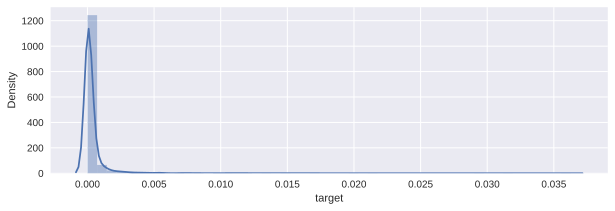

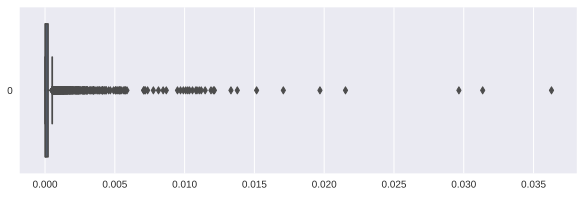

In [50]:
plt.figure(figsize=(10, 3))
sns.distplot(df_pr['target'])
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(df_pr['target'].values, orient='h')
plt.show()

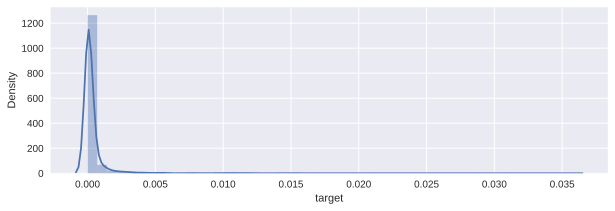

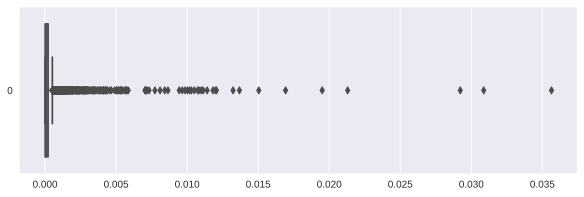

In [51]:
plt.figure(figsize=(10, 3))
sns.distplot(df_pr['target'].apply(lambda x: np.log1p(x)))
plt.show()

plt.figure(figsize=(10, 3))
x=df_pr['target'].apply(lambda x: np.log1p(x))
sns.boxplot(x.values, orient='h')
plt.show()

## Split

In [52]:
df_pr.columns

Index(['age_access_type', 'name', 'type', 'release_year', 'duration',
       'element_uid', 'BUDGET', 'MARKETING', 'RUS', 'USA',
       ...
       'Ридли Скотт', 'Крис Гилл', 'Джеффри Форд', 'Роджер Дикинс',
       'Дариуш Вольски', 'Боб Вайнштейн', 'Харви Вайнштейн', 'Арнон Милчен',
       'Люк Бессон', 'Джек Кёрби'],
      dtype='object', length=1066)

In [53]:
from sklearn.model_selection import train_test_split

sorted_df = df_pr.sort_values('release_year')

test = sorted_df[sorted_df['release_year'] == 2022]
train = sorted_df[sorted_df['release_year'] != 2022]

# for looking at samples
test_df = test.copy(deep=True)
train_df = train.copy(deep=True)

test.drop(['release_year', 'element_uid', 'name'], axis=1, inplace=True)
train.drop(['release_year', 'element_uid', 'name'], axis=1, inplace=True)


X_test, y_test = test.drop('target', axis=1), test['target']
y_test = y_test.apply(lambda x: np.log1p(x))

X, y = train.drop('target', axis=1), train['target']
y = y.apply(lambda x: np.log1p(x))
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.1, 
                                                  shuffle=False)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((3372, 1062), (375, 1062), (12, 1062), (3372,), (375,), (12,))

In [54]:
X_train.columns

Index(['age_access_type', 'type', 'duration', 'BUDGET', 'MARKETING', 'RUS',
       'USA', 'WORLD', 'has_oscar_actor', 'has_oscar_composer',
       ...
       'Ридли Скотт', 'Крис Гилл', 'Джеффри Форд', 'Роджер Дикинс',
       'Дариуш Вольски', 'Боб Вайнштейн', 'Харви Вайнштейн', 'Арнон Милчен',
       'Люк Бессон', 'Джек Кёрби'],
      dtype='object', length=1062)

In [55]:
X_train.drop(columns=['poster_url', 'poster_url_preview'], axis=1, inplace=True)
X_val.drop(columns=['poster_url', 'poster_url_preview'], axis=1, inplace=True)
X_test.drop(columns=['poster_url', 'poster_url_preview'], axis=1, inplace=True)

In [56]:
cat_features = ['age_access_type', 'type']

In [57]:
# sc
from sklearn.preprocessing import StandardScaler

sc_cols = ['duration', 'BUDGET', 'MARKETING', 'RUS', 'USA']

sc=StandardScaler()
sc_train = sc.fit_transform(X_train[sc_cols])

sc_train = pd.DataFrame(sc_train, index=X_train.index, columns=sc_cols)
X_train.drop(sc_cols, axis=1, inplace=True)
print(X_train.shape)
X_train = pd.concat([X_train, sc_train],axis=1)
print(X_train.shape)

# 
sc_val = sc.transform(X_val[sc_cols])
sc_val = pd.DataFrame(sc_val, index=X_val.index, columns=sc_cols)
X_val.drop(sc_cols, axis=1, inplace=True)
print(X_val.shape)
X_val = pd.concat([X_val, sc_val],axis=1) 
print(X_val.shape)

# 
sc_test = sc.transform(X_test[sc_cols])
sc_test = pd.DataFrame(sc_test, index=X_test.index, columns=sc_cols)
X_test.drop(sc_cols, axis=1, inplace=True)
print(X_test.shape)
X_test = pd.concat([X_test, sc_test],axis=1) 
print(X_test.shape)

(3372, 1055)
(3372, 1060)
(375, 1055)
(375, 1060)
(12, 1055)
(12, 1060)


# Modeling

In [59]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.7 MB/s eta 0:00:00


In [60]:
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint

In [61]:
train_dataset = cat.Pool(data=X_train,
                        label=y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(data=X_test, 
                        label=y_test,
                         cat_features=cat_features)

val_dataset = cat.Pool(X_val, y_val,
                       cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

cat_model = cat.CatBoostRegressor(**cat_params)

cat_model.fit(
    train_dataset,
    eval_set=val_dataset,
    early_stopping_rounds=500,
    verbose=100,
    plot=False
)

Learning rate set to 0.061627
0:	learn: 0.0002857	test: 0.0012540	best: 0.0012540 (0)	total: 57.9ms	remaining: 57.9s
100:	learn: 0.0002354	test: 0.0012634	best: 0.0012540 (0)	total: 953ms	remaining: 8.49s
200:	learn: 0.0002246	test: 0.0012655	best: 0.0012540 (0)	total: 2.05s	remaining: 8.17s
300:	learn: 0.0002130	test: 0.0012732	best: 0.0012540 (0)	total: 3.45s	remaining: 8.02s
400:	learn: 0.0002013	test: 0.0012766	best: 0.0012540 (0)	total: 5.77s	remaining: 8.62s
500:	learn: 0.0001927	test: 0.0012792	best: 0.0012540 (0)	total: 8.37s	remaining: 8.34s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.001254048835
bestIteration = 0

Shrink model to first 1 iterations.


In [62]:
y_pred = cat_model.predict(test_dataset)

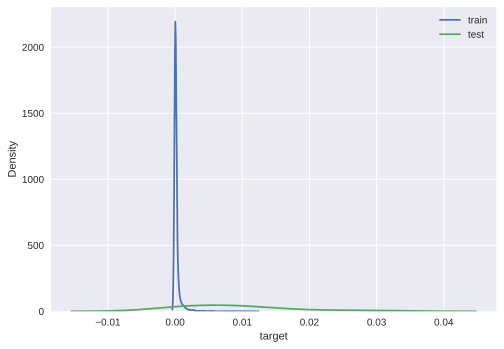

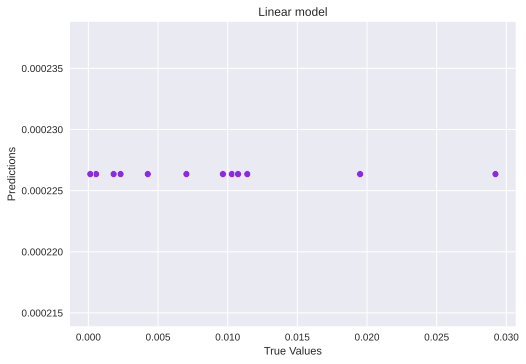

In [65]:
target_distr_linear(y_train, y_test, y_pred)   

In [66]:
def inverse_transform(feature):
    return np.expm1(feature)

calc_metrics(inverse_transform(y_test), inverse_transform(y_pred))

*** VAL **: 
MSE:   0.00014546719072116565
RMSE:  0.012060978016776486
R2:    -1.1160807240872819
MAE:   0.0087738099001265
MedAE: 0.008156617832759198
------------------------------


In [68]:
# errors = y_test - y_pred
# draw_res_analys(errors, y_pred)

**Conclusion**
* The trend in the second figure is not visible, now we will confirm the presence of heteroskedasticity on tests.

In [69]:
test_df['PREDS'] = y_pred.tolist()
test_df['TARGET'] = y_test.tolist()
test_df

,age_access_type,name,type,release_year,duration,element_uid,BUDGET,MARKETING,RUS,USA,...,Джеффри Форд,Роджер Дикинс,Дариуш Вольски,Боб Вайнштейн,Харви Вайнштейн,Арнон Милчен,Люк Бессон,Джек Кёрби,PREDS,TARGET
3067,18,Всё везде и сразу,MOVIE,2022,15.899940,a8749d17-85fc-4ccf-ba56-75991c3a9da4,NaN,NaN,14.844788,18.064129,...,0,0,0,0,0,0,0,0,0.000226,0.010298
3070,16,9 жизней,MOVIE,2022,15.566448,a7979b64-cf82-4c7f-86d8-05670b07d1b0,NaN,NaN,12.154206,NaN,...,0,0,0,0,0,0,0,0,0.000226,0.002310
6224,16,Мегрэ и таинственная девушка,MOVIE,2022,15.479437,29107ac9-48c5-4549-83f2-88551827bba1,NaN,NaN,12.657810,NaN,...,0,0,0,0,0,0,0,0,0.000226,0.007036
4015,18,Отряд «Призрак»,MOVIE,2022,15.656060,f132627d-5b3b-443f-bccd-feb92b51d08d,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.000226,0.000552
4516,16,Лето 1941 года,MOVIE,2022,15.720599,13e81f9e-ecd3-4781-949d-9e9bb0beceb5,NaN,NaN,8.828055,NaN,...,0,0,0,0,0,0,0,0,0.000226,0.001812
4017,16,Парни под прикрытием,MOVIE,2022,15.501910,1b9df53f-e556-4f00-8d1f-67b2cc74e01a,NaN,NaN,12.266231,NaN,...,0,0,0,0,0,0,0,0,0.000226,0.011406
6335,16,Скрежет,MOVIE,2022,15.501910,ec7d1007-7597-4c93-8abb-1c04bcaf71ab,NaN,NaN,12.265002,12.116837,...,0,0,0,0,0,0,0,0,0.000226,0.004264
3996,16,Тюрьма суперзлодеев,MOVIE,2022,15.627073,0a702293-b8a5-4c0e-aa50-e05bcc6feb7c,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.000226,0.010742
4097,18,Флешбэк,MOVIE,2022,15.729488,50adaca1-09c0-41e9-b6cc-b9200c734661,NaN,NaN,13.978818,15.807356,...,0,0,0,0,0,0,0,0,0.000226,0.019505
4077,16,Игра теней,MOVIE,2022,15.646491,8c28129c-60a9-4ab7-a899-66d1473f2888,NaN,NaN,12.486375,16.076346,...,0,0,0,0,0,0,0,0,0.000226,0.029220


In [70]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    imp_features_df = pd.DataFrame({"score":imp, "feat": model.feature_names_})
    imp_features_df = imp_features_df.sort_values(by='score')[-20:]

    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp_features_df['score'].values, y=imp_features_df["feat"].values)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

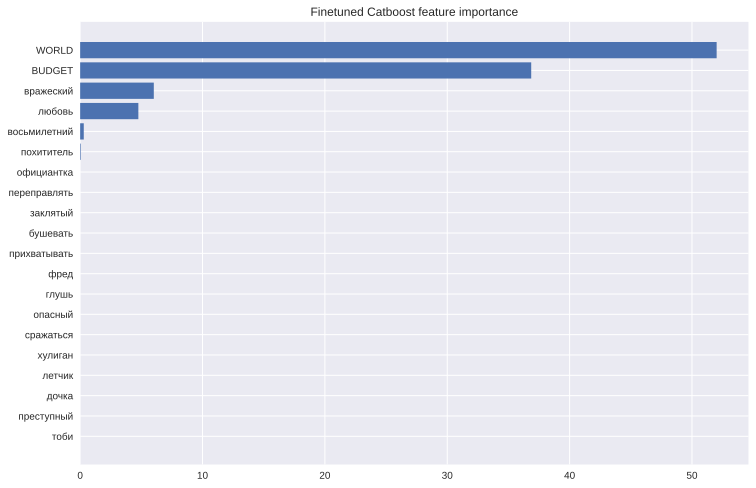

In [71]:
get_feature_imp(cat_model, train_dataset)

# Tuning

In [72]:
train_dataset = cat.Pool(X_train, y_train, 
                         cat_features=cat_features) 

test_dataset = cat.Pool(X_test, y_test,
                         cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

In [73]:
parameters_distr = {'depth': randint(5, 10),
              'learning_rate': uniform(0.01, 0.1),
              'iterations': [5000, 10000, 15000]
             }

cat_model = cat.CatBoostRegressor(**cat_params)
grid = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters_distr, 
                            cv=5, 
#                           n_jobs=-1,
                          verbose=3)

grid.fit(X_train, y_train)

import pickle
with open('bestimator_okko_rat_ntop_scrs_kws_views', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)
grid.best_params_

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 0.0002882	total: 21.1ms	remaining: 1m 45s
1:	learn: 0.0002878	total: 37.2ms	remaining: 1m 32s
2:	learn: 0.0002872	total: 64.8ms	remaining: 1m 48s
3:	learn: 0.0002867	total: 92.6ms	remaining: 1m 55s
4:	learn: 0.0002862	total: 114ms	remaining: 1m 53s
5:	learn: 0.0002857	total: 140ms	remaining: 1m 56s
6:	learn: 0.0002852	total: 159ms	remaining: 1m 53s
7:	learn: 0.0002846	total: 174ms	remaining: 1m 48s
8:	learn: 0.0002841	total: 189ms	remaining: 1m 45s
9:	learn: 0.0002836	total: 211ms	remaining: 1m 45s
10:	learn: 0.0002831	total: 244ms	remaining: 1m 50s
11:	learn: 0.0002826	total: 270ms	remaining: 1m 52s
12:	learn: 0.0002820	total: 292ms	remaining: 1m 52s
13:	learn: 0.0002815	total: 309ms	remaining: 1m 50s
14:	learn: 0.0002809	total: 326ms	remaining: 1m 48s
15:	learn: 0.0002805	total: 343ms	remaining: 1m 46s
16:	learn: 0.0002801	total: 360ms	remaining: 1m 45s
17:	learn: 0.0002797	total: 378ms	remaining: 1m 44s
18

{'depth': 6, 'iterations': 5000, 'learning_rate': 0.010125405736699414}

In [74]:
best_cat = grid.best_estimator_
grid.best_params_

{'depth': 6, 'iterations': 5000, 'learning_rate': 0.010125405736699414}

In [75]:
grid.best_score_

-0.22271193563203048

In [76]:
best_cat.save_model('parsed_ratings_okko_tune_ntop_scrs_kws_views')

In [77]:
y_pred = best_cat.predict(test_dataset)

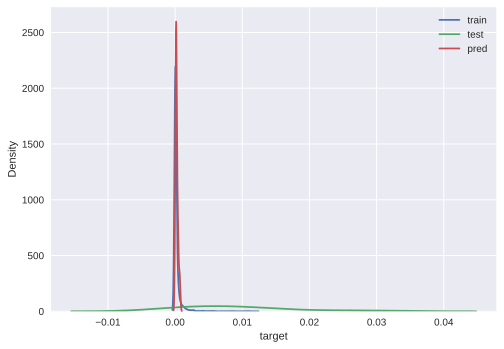

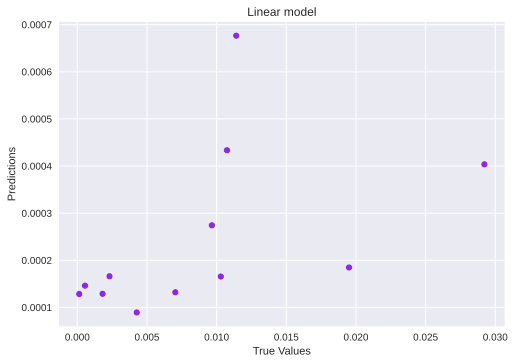

In [78]:
target_distr_linear(y_train, y_test, y_pred)  

In [79]:
calc_metrics(inverse_transform(y_test), inverse_transform(y_pred))

*** VAL **: 
MSE:   0.00014382928361677933
RMSE:  0.011992884707891564
R2:    -1.0922544328510604
MAE:   0.008741465510200745
MedAE: 0.008179833516709771
------------------------------


In [80]:
# errors = y_test - y_pred
# draw_res_analys(errors, y_pred)

In [81]:
test_df['PREDS_tune'] = y_pred.tolist()
test_df

,age_access_type,name,type,release_year,duration,element_uid,BUDGET,MARKETING,RUS,USA,...,Роджер Дикинс,Дариуш Вольски,Боб Вайнштейн,Харви Вайнштейн,Арнон Милчен,Люк Бессон,Джек Кёрби,PREDS,TARGET,PREDS_tune
3067,18,Всё везде и сразу,MOVIE,2022,15.899940,a8749d17-85fc-4ccf-ba56-75991c3a9da4,NaN,NaN,14.844788,18.064129,...,0,0,0,0,0,0,0,0.000226,0.010298,0.000166
3070,16,9 жизней,MOVIE,2022,15.566448,a7979b64-cf82-4c7f-86d8-05670b07d1b0,NaN,NaN,12.154206,NaN,...,0,0,0,0,0,0,0,0.000226,0.002310,0.000166
6224,16,Мегрэ и таинственная девушка,MOVIE,2022,15.479437,29107ac9-48c5-4549-83f2-88551827bba1,NaN,NaN,12.657810,NaN,...,0,0,0,0,0,0,0,0.000226,0.007036,0.000132
4015,18,Отряд «Призрак»,MOVIE,2022,15.656060,f132627d-5b3b-443f-bccd-feb92b51d08d,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.000226,0.000552,0.000146
4516,16,Лето 1941 года,MOVIE,2022,15.720599,13e81f9e-ecd3-4781-949d-9e9bb0beceb5,NaN,NaN,8.828055,NaN,...,0,0,0,0,0,0,0,0.000226,0.001812,0.000129
4017,16,Парни под прикрытием,MOVIE,2022,15.501910,1b9df53f-e556-4f00-8d1f-67b2cc74e01a,NaN,NaN,12.266231,NaN,...,0,0,0,0,0,0,0,0.000226,0.011406,0.000676
6335,16,Скрежет,MOVIE,2022,15.501910,ec7d1007-7597-4c93-8abb-1c04bcaf71ab,NaN,NaN,12.265002,12.116837,...,0,0,0,0,0,0,0,0.000226,0.004264,0.000089
3996,16,Тюрьма суперзлодеев,MOVIE,2022,15.627073,0a702293-b8a5-4c0e-aa50-e05bcc6feb7c,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.000226,0.010742,0.000433
4097,18,Флешбэк,MOVIE,2022,15.729488,50adaca1-09c0-41e9-b6cc-b9200c734661,NaN,NaN,13.978818,15.807356,...,0,0,0,0,0,0,0,0.000226,0.019505,0.000185
4077,16,Игра теней,MOVIE,2022,15.646491,8c28129c-60a9-4ab7-a899-66d1473f2888,NaN,NaN,12.486375,16.076346,...,0,0,0,0,0,0,0,0.000226,0.029220,0.000404


In [82]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 8.5 MB/s eta 0:00:00


In [83]:
from catboost import Pool
import shap

shap.initjs()
explainer = shap.TreeExplainer(best_cat)
shap_values = explainer.shap_values(Pool(X_train, y_train, cat_features=cat_features))

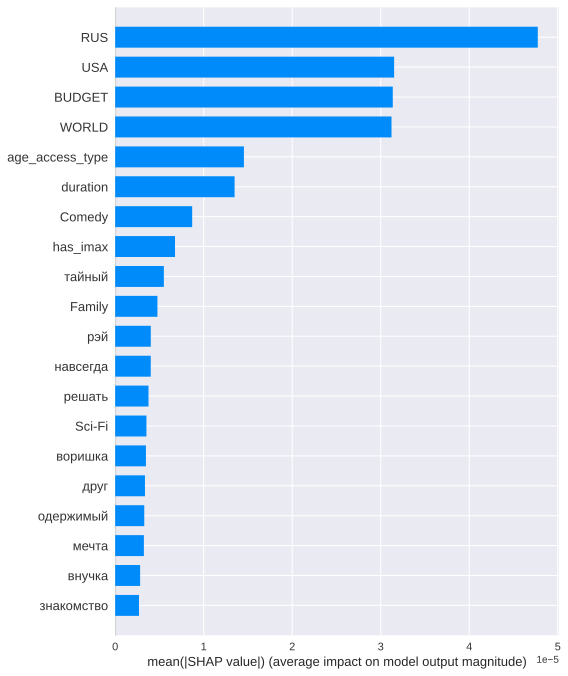

In [84]:
# feature importance plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

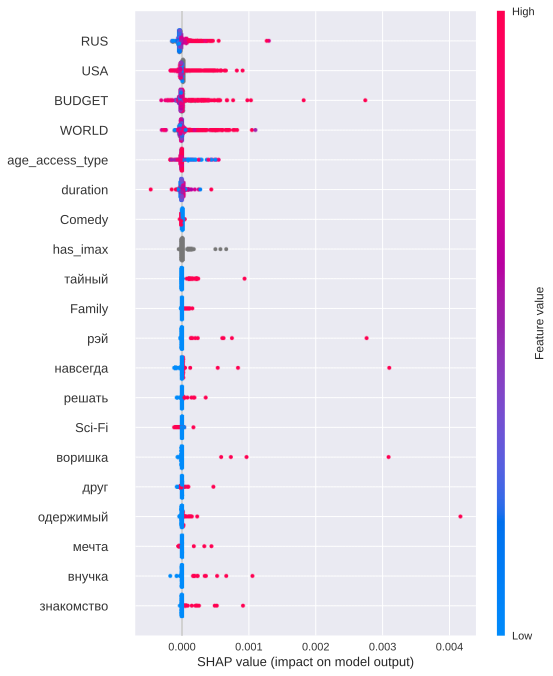

In [85]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)